In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns
import random

from datetime import datetime


### Return Distribution for Single Stock (figure from slide 6)
Q: I calculated another net % mean than the figure, meaning either (1) the figure in the slides didn't actually calculate net % mean or (2) my original parameters are not correct. 


In [15]:
# return distribution for single stock

# set seed to 3 for reproducibility
np.random.seed(3)

# params
N = 500000
mu = 0.04
sigma = 0.0324
omega = 0.33
theta = 0.12
delta = 0.0064


def single_stock_returns (N, mu, sigma, omega, theta, delta):
    # w_t: the continuous part, smooth day-to-day prices
    w = np.random.normal(loc=mu, scale=sigma, size=N)

    # getting z: the jumps, or the suddent spikes/crashes
    # first, the number of jumps
    # we're trying to draw until failure, so this is a geometric probability distribution.
    p_fail = 1 - omega 
    j = np.random.geometric(p=p_fail, size=N) - 1 #-1 for number of jumps it was successful

    # i think this is scale of schock
    z_t = np.random.normal(loc=theta, scale=delta, size=N)

    z = j * z_t
    
    # gross returns 
    return np.exp(w+z)

returns = single_stock_returns (N, mu, sigma, omega, theta, delta)


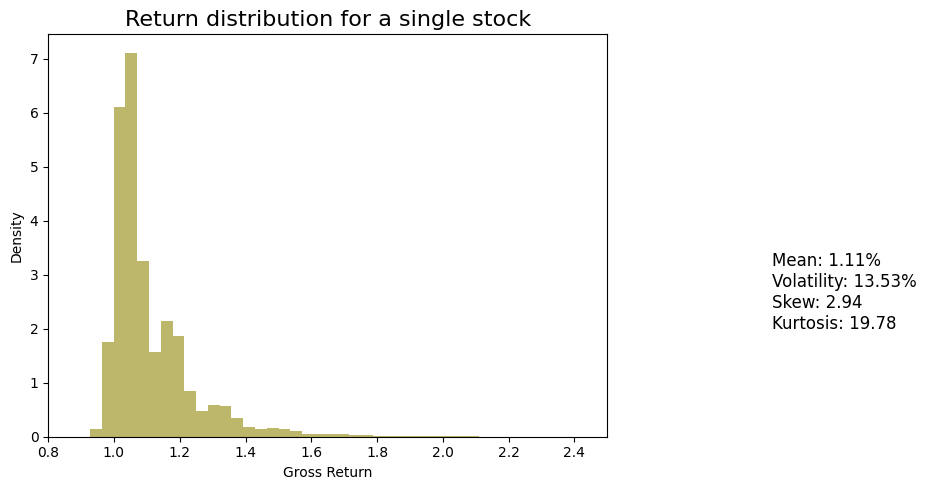

In [16]:
# plot!
plt.figure(figsize=(10, 5))
plt.hist(returns, bins=100, color='darkkhaki', density=True)
plt.title("Return distribution for a single stock", fontsize=16)
plt.xlabel("Gross Return")
plt.ylabel("Density")

# stats
mean = returns.mean()
vol = returns.std()
skewness = skew(returns)
kurt = kurtosis(returns, fisher=False)

# calculated the net return in %
mean_pct = (mean) # either the figure in the slides didn't actually calculate net % mean, or my original parameters are not correct

vol_pct = vol*100

stats_text = (
    f"Mean: {mean_pct:.2f}%\n"
    f"Volatility: {vol_pct:.2f}%\n" 
    f"Skew: {skewness:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)
plt.text(3, 2, stats_text, fontsize=12)

plt.xlim(0.8, 2.5)
plt.tight_layout()
plt.show()


## Return Distribution for a large stock (AAPL)
Data: Query ID 9692246

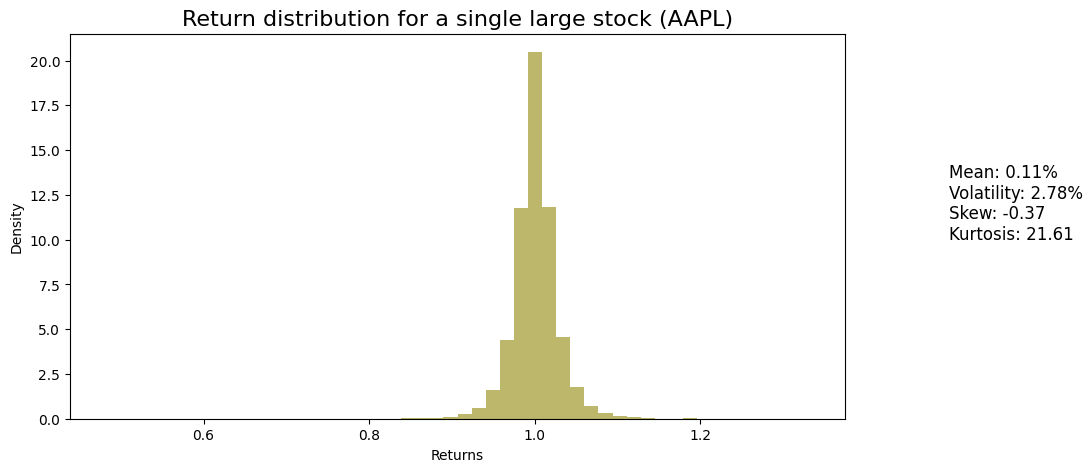

In [4]:
# return distribution for a single stock (6) ; this is for apple. 
df = pd.read_csv("./data/WRDS_aaple_returns.csv")
#print(df.head())

# convert returns to a numeric column
df["RET"] = pd.to_numeric(df["RET"], errors="coerce")
df = df.dropna(subset = "RET")
df["GRET"] = df["RET"] + 1 #gross returns, also to match the returns chart from the slides

g_returns = df["GRET"]

mean = np.mean(g_returns) - 1
vol = np.std(g_returns)
skewness = skew(g_returns)
kurt = kurtosis(g_returns, fisher=False)  # use Pearson definition (normal = 3)

plt.figure(figsize=(10, 5))
plt.hist(g_returns, bins=50, color="darkkhaki", density=True)
plt.title("Return distribution for a single large stock (AAPL)", fontsize=16)
plt.xlabel("Returns")
plt.ylabel("Density")

stats_text = (
    f"Mean: {mean*100:.2f}%\n"
    f"Volatility: {vol*100:.2f}%\n"
    f"Skew: {skewness:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)
plt.text(1.5, 10, stats_text, fontsize=12)

plt.show()

## Return Distribution for a small stock (PAHC)
Data: Query ID 9977807  
First non billion company in Russell 2000 (from 2025 BOY data)

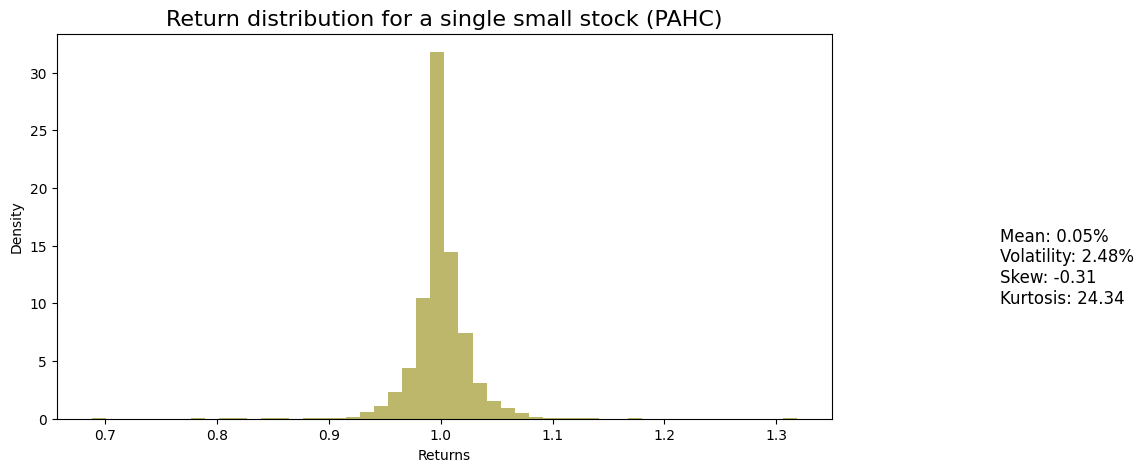

In [5]:
# return distribution for a small stock
df = pd.read_csv("./data/WRDS_pahc_returns.csv")
#print(df.head())

# convert returns to a numeric column
df["RET"] = pd.to_numeric(df["RET"], errors="coerce")
df = df.dropna(subset = "RET")
df["GRET"] = df["RET"] + 1 #gross returns, also to match the returns chart from the slides

g_returns = df["GRET"]

mean = np.mean(g_returns) - 1
vol = np.std(g_returns)
skewness = skew(g_returns)
kurt = kurtosis(g_returns, fisher=False)  # use Pearson definition (normal = 3)

plt.figure(figsize=(10, 5))
plt.hist(g_returns, bins=50, color="darkkhaki", density=True)
plt.title("Return distribution for a single small stock (PAHC)", fontsize=16)
plt.xlabel("Returns")
plt.ylabel("Density")

stats_text = (
    f"Mean: {mean*100:.2f}%\n"
    f"Volatility: {vol*100:.2f}%\n"
    f"Skew: {skewness:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)
plt.text(1.5, 10, stats_text, fontsize=12)

plt.show()

## Return distribution for portfolio (from slide 7)

Q: I calculated another net % mean than the figure, meaning either (1) the figure in the slides didn't actually calculate net % mean or (2) my original parameters are not correct.

iid copies = independent and identically distributed 

In [6]:
# return distribution for a portfolio

m = 100

# 100 copies from the previous distribution
returns_matrix = np.vstack([single_stock_returns(N, mu, sigma, omega, theta, delta) for _ in range(m)]) # matrix of (m,N), so (100, 500K)

# each day, portfoliio_returns are the average of the returns for the 100 stocks for that day
portfolio_returns = returns_matrix.mean(axis=0) # down the column 

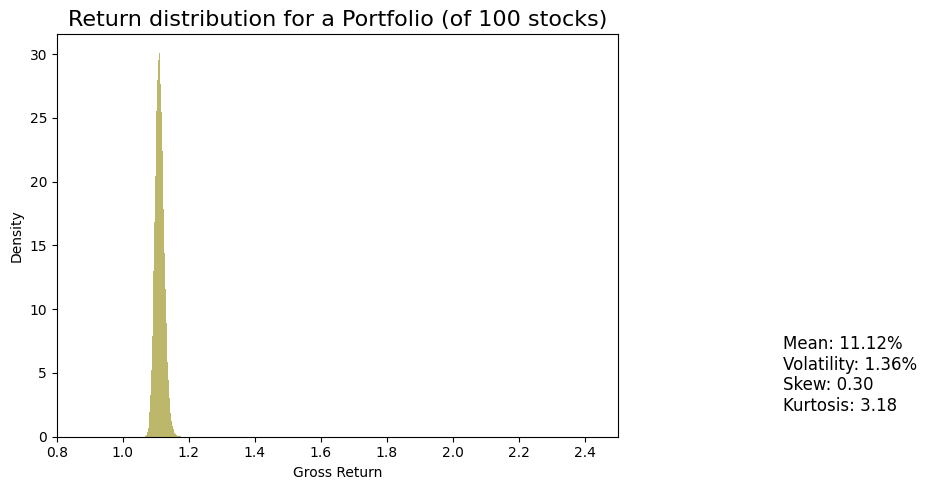

In [7]:
# plot!
plt.figure(figsize=(10, 5))
plt.hist(portfolio_returns, bins=100, color='darkkhaki', density=True)
plt.title("Return distribution for a Portfolio (of 100 stocks)", fontsize=16)
plt.xlabel("Gross Return")
plt.ylabel("Density")

# stats
mean = portfolio_returns.mean()
vol = portfolio_returns.std()
skewness = skew(portfolio_returns)
kurt = kurtosis(portfolio_returns, fisher=False)

# calculated the net return in %
mean_pct = (mean - 1) * 100 # same issue here: either the figure in the slides didn't actually calculate net % mean, or my original parameters are not correct
vol_pct = vol*100

stats_text = (
    f"Mean: {mean_pct:.2f}%\n"
    f"Volatility: {vol_pct:.2f}%\n" 
    f"Skew: {skewness:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)
plt.text(3, 2, stats_text, fontsize=12)

plt.xlim(0.8, 2.5)
plt.tight_layout()
plt.show()


## Daily Returns on the Market Portfolio (slide 12)

Here is the data I got:

CRSP > Annual Update > Index - Version 2 (CIZ) > CRSP Daily Stock File Indexes

Dates 1988-06-01 to 2022-12-32 > Index Code: 1000080 > All return information > csv 

Query 9977105

Q: I don't have the same frequency as what the figure has, so I wonder if I got the right data?

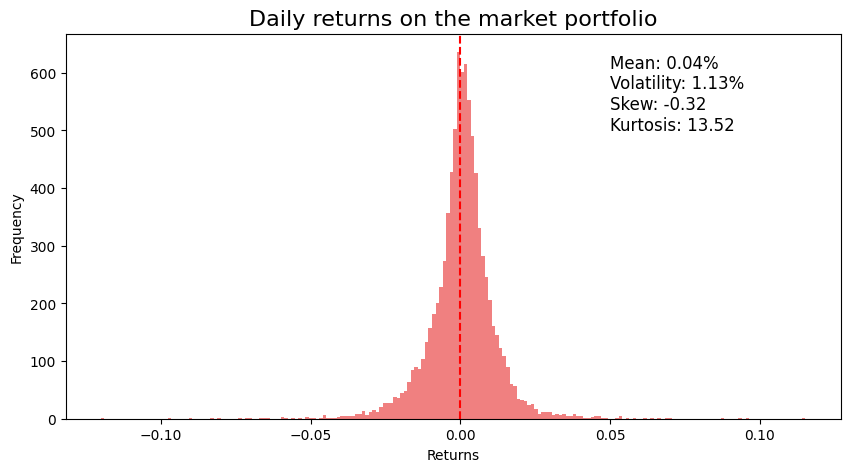

In [8]:
# daily returns on market portfolio (12)

df = pd.read_csv("./data/query_slide12.csv")

df["COL1"] = pd.to_numeric(df["COL1"], errors = "coerce")
df = df.dropna(subset = "COL1")
df["returns"] = df["COL1"]

returns = df["returns"]


mean = np.mean(returns)
vol = np.std(returns)
skw = skew(returns)
kurt = kurtosis(returns, fisher=False)  # use Pearson definition (normal = 3)

plt.figure(figsize=(10, 5))
plt.hist(returns, bins=200, color='lightcoral', density=False)
plt.axvline(x=0, color='red', linestyle='dashed')

stats_text = (
    f"Mean: {mean*100:.2f}%\n"
    f"Volatility: {vol*100:.2f}%\n"
    f"Skew: {skw:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)

plt.text(0.05, 500, stats_text, fontsize=12)

plt.title("Daily returns on the market portfolio", fontsize=16)
plt.xlabel("Returns")
plt.ylabel("Frequency")

plt.show()


## Sampling Distribution for Kurtosis (Slide 13)

In [9]:
N = 500000
mu = 0.023
sigma = 0.01
omega= 0.01
theta = -0.3
delta = 0.15

# fix seed
np.random.seed(71)

# market returns based on our variables
market_returns = single_stock_returns(N, mu, sigma, omega, theta, delta)
pop_kurt = kurtosis(market_returns, fisher=False) # find the the population kurtosis for these returns

# Monte carlo sampling
iter = 10000
sample_size = 50

sample_kurt = np.empty(iter) # empty error for eachc sample's kurtosis

# for each iter, pick 50 distinct market returns (w/o replacement)
for i in range(iter):
    sample = np.random.choice(market_returns, size=sample_size, replace=False)
    sample_kurt[i] = kurtosis(sample, fisher=False)

mean_sample_kurt = sample_kurt.mean()

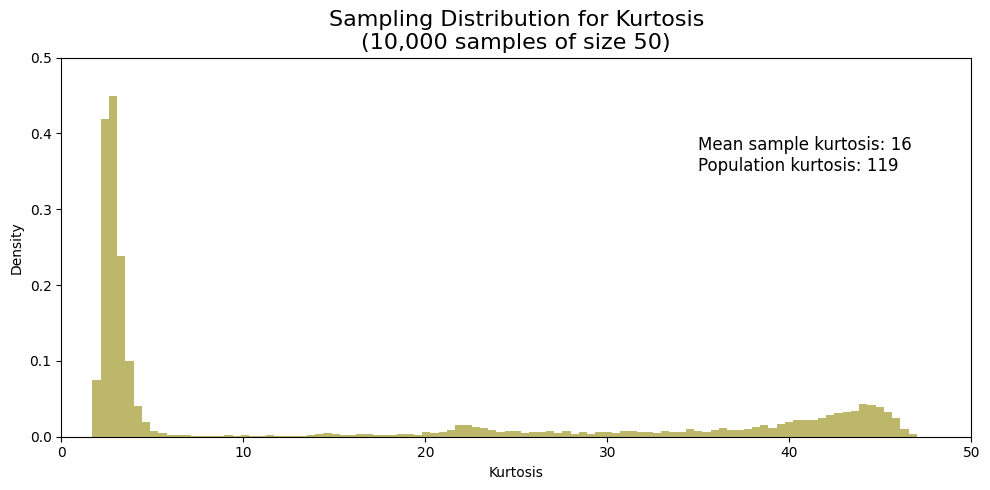

In [10]:
# plot!

plt.figure(figsize=(10, 5))
plt.hist(sample_kurt, bins=100, color="darkkhaki", density=True)
plt.title("Sampling Distribution for Kurtosis\n(10,000 samples of size 50)", fontsize=16)
plt.xlabel("Kurtosis")
plt.ylabel("Density")

stats_text = (
    f"Mean sample kurtosis: {mean_sample_kurt:.0f}\n"
    f"Population kurtosis: {pop_kurt:.0f}"
)

plt.text(35, 0.35, stats_text, fontsize=12)

plt.xlim(0, 50)
plt.ylim(0.0,0.5)
plt.tight_layout()
plt.show()


## Distribution of returns to putwrite index (Slide 22)

Data - for the putwrite index, I downloaded the historical data that the CBOE provided, which was from 2007-2025. 

Q: My stats for both the market returns and CBOE aren't exactly the same as the stats in the figure, not sure if this is the right data? 

In [11]:
# distribution of returns to putwrite index - compare market portfolio to put selling strategy (22)
market = pd.read_csv("./data/query_slide12.csv")
cboe = pd.read_csv("./data/CBOE_putwrite_index.csv")

# get the data for both
# get the same date timeframe from 01/03/2007 to 2022/12/31
market["DlyCalDt"] = pd.to_datetime(market["DlyCalDt"], format="%Y%m%d")
start_date = datetime(2007, 1, 3)
market = market[market["DlyCalDt"] >= start_date]

market["COL1"] = pd.to_numeric(market["COL1"], errors = "coerce")
market = market.dropna(subset = "COL1")
market_returns = market["COL1"]

# get time frame  for cboe 
cboe["DATE"] = pd.to_datetime(cboe["DATE"])
end_date = datetime(2022, 12, 31)
cboe = cboe[cboe["DATE"] <= end_date]

cboe["return"] = pd.to_numeric(cboe["return"], errors = "coerce")
cboe = cboe.dropna(subset = "return")
putwrite_returns = cboe["return"]

/var/folders/1q/zjhbsb817hqgmgmz4y0jrh0r0000gn/T/ipykernel_41480/2385889168.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cboe["DATE"] = pd.to_datetime(cboe["DATE"])


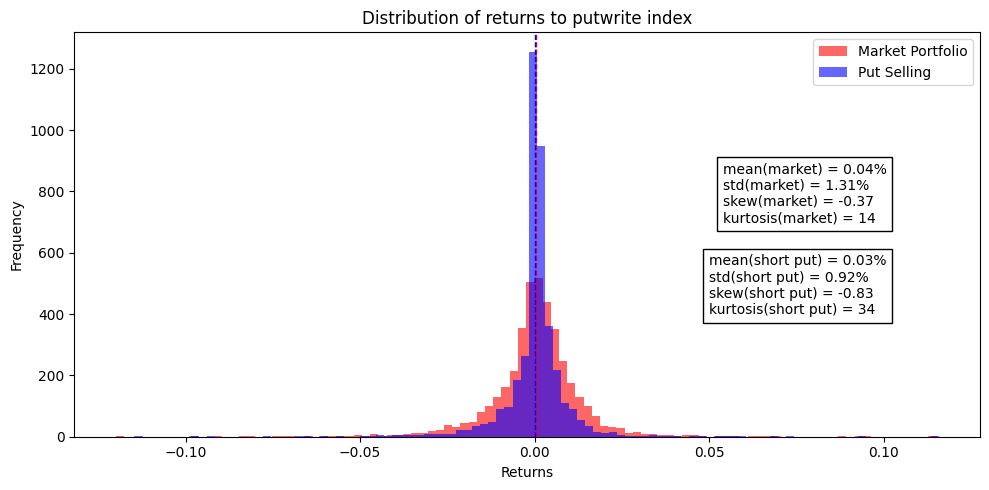

In [12]:
#plot! 
plt.figure(figsize=(10, 5))
plt.hist(market_returns, bins=100, alpha=0.6, color='red', label="Market Portfolio")
plt.hist(putwrite_returns, bins=100, alpha=0.6, color='blue', label="Put Selling")
plt.axvline(market_returns.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(putwrite_returns.mean(), color='blue', linestyle='dashed', linewidth=1)

plt.title("Distribution of returns to putwrite index")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.legend()

market_stats = (
    f"mean(market) = {np.mean(market_returns)*100:.2f}%\n"
    f"std(market) = {np.std(market_returns)*100:.2f}%\n"
    f"skew(market) = {skew(market_returns):.2f}\n"
    f"kurtosis(market) = {kurtosis(market_returns, fisher=False):.0f}"
)

put_stats = (
    f"mean(short put) = {np.mean(putwrite_returns)*100:.2f}%\n"
    f"std(short put) = {np.std(putwrite_returns)*100:.2f}%\n"
    f"skew(short put) = {skew(putwrite_returns):.2f}\n"
    f"kurtosis(short put) = {kurtosis(putwrite_returns, fisher=False):.0f}"
)

plt.text(0.054, 700, market_stats, fontsize=10, bbox=dict(facecolor="white", edgecolor="black"))
plt.text(0.05, 400, put_stats, fontsize=10, bbox=dict(facecolor="white", edgecolor="black"))

plt.tight_layout()
plt.show()



## Distribution of returns to putwrite index (Slide 23)

In [13]:
# from the notes, threshold was 0.03
threshold = 0.03

market_mask    = np.abs(market_returns)    > threshold
putwrite_mask  = np.abs(putwrite_returns)  > threshold

market_outliers   = market_returns[market_mask]
putwrite_outliers = putwrite_returns[putwrite_mask]

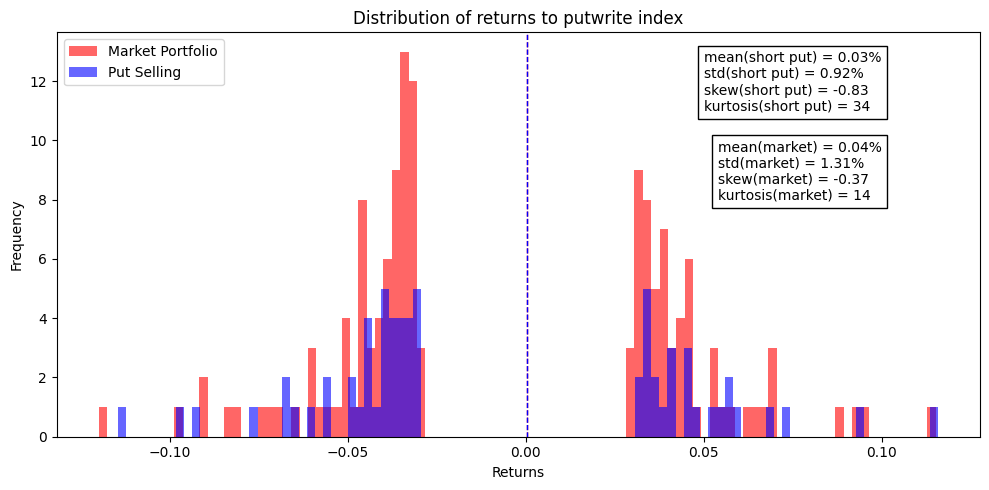

In [14]:
#plot! 
plt.figure(figsize=(10, 5))
plt.hist(market_outliers, bins=100, alpha=0.6, color='red', label="Market Portfolio")
plt.hist(putwrite_outliers, bins=100, alpha=0.6, color='blue', label="Put Selling")
plt.axvline(market_returns.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(putwrite_returns.mean(), color='blue', linestyle='dashed', linewidth=1)

plt.title("Distribution of returns to putwrite index")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.legend()

market_stats = (
    f"mean(market) = {np.mean(market_returns)*100:.2f}%\n"
    f"std(market) = {np.std(market_returns)*100:.2f}%\n"
    f"skew(market) = {skew(market_returns):.2f}\n"
    f"kurtosis(market) = {kurtosis(market_returns, fisher=False):.0f}"
)

put_stats = (
    f"mean(short put) = {np.mean(putwrite_returns)*100:.2f}%\n"
    f"std(short put) = {np.std(putwrite_returns)*100:.2f}%\n"
    f"skew(short put) = {skew(putwrite_returns):.2f}\n"
    f"kurtosis(short put) = {kurtosis(putwrite_returns, fisher=False):.0f}"
)

plt.text(0.054, 8, market_stats, fontsize=10, bbox=dict(facecolor="white", edgecolor="black"))
plt.text(0.05, 11, put_stats, fontsize=10, bbox=dict(facecolor="white", edgecolor="black"))

plt.tight_layout()
plt.show()

